# Real-time Election Results: Portugal 2019 Data Set

https://archive.ics.uci.edu/ml/datasets/Real-time+Election+Results%3A+Portugal+2019



Data Set Information:

A data set describing the evolution of results in the Portuguese Parliamentary Elections of October 6th 2019.
The data spans a time interval of 4 hours and 25 minutes, in intervals of 5 minutes, concerning the results of the 27 parties involved in the electoral event.
The data set is tailored for predictive modelling tasks, mostly focused on numerical forecasting tasks.
Regardless, it allows for other tasks such as ordinal regression or learn-to-rankProvide a short description of your data set (less than 200 characters).

Additional (and updated) information may be found in [Web Link] :
- Raw data sets
- R code to build the final data set
- Basic operations to build predictive modelling tasks using this data set




Attribute Information:

TimeElapsed (Numeric): Time (minutes) passed since the first data acquisition
time (timestamp): Date and time of the data acquisition
territoryName (string): Short name of the location (district or nation-wide)
totalMandates (numeric): MP's elected at the moment
availableMandates (numeric): MP's left to elect at the moment
numParishes (numeric): Total number of parishes in this location
numParishesApproved (numeric): Number of parishes approved in this location
blankVotes (numeric): Number of blank votes
blankVotesPercentage (numeric): Percentage of blank votes
nullVotes (numeric): Number of null votes
nullVotesPercentage (numeric): Percentage of null votes
votersPercentage (numeric): Percentage of voters
subscribedVoters (numeric): Number of subscribed voters in the location
totalVoters (numeric): Percentage of blank votes
pre.blankVotes (numeric): Number of blank votes (previous election)
pre.blankVotesPercentage (numeric): Percentage of blank votes (previous election)
pre.nullVotes (numeric): Number of null votes (previous election)
pre.nullVotesPercentage (numeric): Percentage of null votes (previous election)
pre.votersPercentage (numeric): Percentage of voters (previous election)
pre.subscribedVoters (numeric): Number of subscribed voters in the location (previous election)
pre.totalVoters (numeric): Percentage of blank votes (previous election)
Party (string): Political Party
Mandates (numeric): MP's elected at the moment for the party in a given district
Percentage (numeric): Percentage of votes in a party
validVotesPercentage (numeric): Percentage of valid votes in a party
Votes (numeric): Percentage of party votes
Hondt (numeric): Number of MP's according to the distribution of votes now
FinalMandates (numeric): Target: final number of elected MP's in a district/national-level



In [1]:
#import libary for use method
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df =pd.read_csv('ElectionData.csv')
df.head()

,TimeElapsed,time,territoryName,totalMandates,availableMandates,numParishes,numParishesApproved,blankVotes,blankVotesPercentage,nullVotes,...,pre.votersPercentage,pre.subscribedVoters,pre.totalVoters,Party,Mandates,Percentage,validVotesPercentage,Votes,Hondt,FinalMandates
0,0,2019-10-06 20:10:02,Território Nacional,0,226,3092,1081,9652,2.5,8874,...,52.66,813743,428546,PS,0,38.29,40.22,147993,94,106
1,0,2019-10-06 20:10:02,Território Nacional,0,226,3092,1081,9652,2.5,8874,...,52.66,813743,428546,PPD/PSD,0,33.28,34.95,128624,81,77
2,0,2019-10-06 20:10:02,Território Nacional,0,226,3092,1081,9652,2.5,8874,...,52.66,813743,428546,B.E.,0,6.81,7.15,26307,16,19
3,0,2019-10-06 20:10:02,Território Nacional,0,226,3092,1081,9652,2.5,8874,...,52.66,813743,428546,CDS-PP,0,4.90,5.14,18923,12,5
4,0,2019-10-06 20:10:02,Território Nacional,0,226,3092,1081,9652,2.5,8874,...,52.66,813743,428546,PCP-PEV,0,4.59,4.83,17757,11,12


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21643 entries, 0 to 21642
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   TimeElapsed               21643 non-null  int64  
 1   time                      21643 non-null  object 
 2   territoryName             21643 non-null  object 
 3   totalMandates             21643 non-null  int64  
 4   availableMandates         21643 non-null  int64  
 5   numParishes               21643 non-null  int64  
 6   numParishesApproved       21643 non-null  int64  
 7   blankVotes                21643 non-null  int64  
 8   blankVotesPercentage      21643 non-null  float64
 9   nullVotes                 21643 non-null  int64  
 10  nullVotesPercentage       21643 non-null  float64
 11  votersPercentage          21643 non-null  float64
 12  subscribedVoters          21643 non-null  int64  
 13  totalVoters               21643 non-null  int64  
 14  pre.bl

In [4]:
df.shape

(21643, 28)

In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
TimeElapsed,21643.0,133.146052,7.765119e+01,0.00,65.00,135.00,200.00,265.00
totalMandates,21643.0,11.544795,3.131457e+01,0.00,1.00,4.00,9.00,226.00
availableMandates,21643.0,11.499284,3.173878e+01,0.00,0.00,3.00,9.00,226.00
numParishes,21643.0,309.956013,6.590559e+02,54.00,75.00,147.00,242.00,3092.00
numParishesApproved,21643.0,261.090237,5.833774e+02,3.00,67.00,120.00,208.00,3092.00
blankVotes,21643.0,8875.066673,2.148487e+04,19.00,1188.00,2998.00,6889.00,129599.00
blankVotesPercentage,21643.0,2.621629,7.952894e-01,0.53,2.23,2.64,2.98,5.46
nullVotes,21643.0,6148.068752,1.473547e+04,39.00,1094.00,2232.00,4121.00,88539.00
nullVotesPercentage,21643.0,1.961471,3.752501e-01,1.34,1.72,1.87,2.23,3.35
votersPercentage,21643.0,51.983722,4.854380e+00,35.98,50.29,53.13,54.55,59.87


In [6]:
#checking for missing values in data
df.isnull().sum()

TimeElapsed                 0
time                        0
territoryName               0
totalMandates               0
availableMandates           0
numParishes                 0
numParishesApproved         0
blankVotes                  0
blankVotesPercentage        0
nullVotes                   0
nullVotesPercentage         0
votersPercentage            0
subscribedVoters            0
totalVoters                 0
pre.blankVotes              0
pre.blankVotesPercentage    0
pre.nullVotes               0
pre.nullVotesPercentage     0
pre.votersPercentage        0
pre.subscribedVoters        0
pre.totalVoters             0
Party                       0
Mandates                    0
Percentage                  0
validVotesPercentage        0
Votes                       0
Hondt                       0
FinalMandates               0
dtype: int64

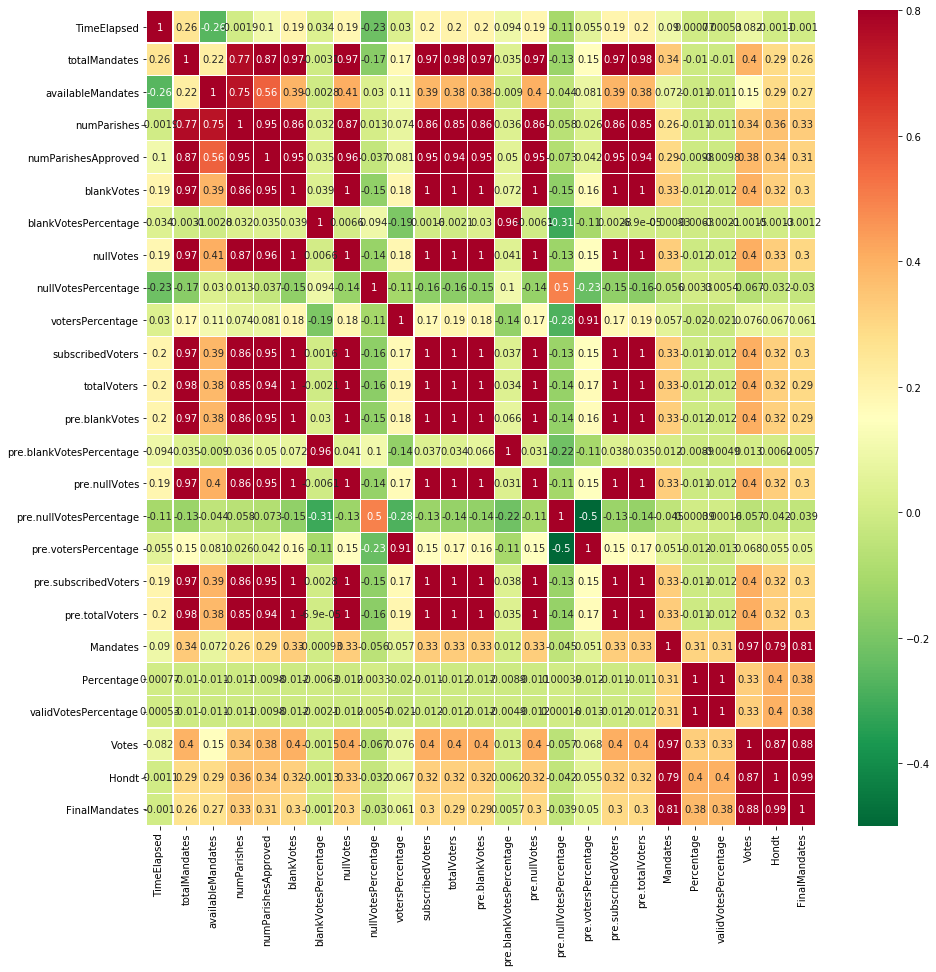

In [7]:
# Correlation Plot
corrmat = df.corr()

#Set uo the matplolib figure
f, ax = plt.subplots(figsize=(15, 15))

#Draw the heatmap using seaborn
colormap = plt.cm.RdYlGn_r
sns.heatmap(corrmat, linewidths=0.1, cmap = colormap, linecolor = 'White', vmax=0.8, annot=True)

In [8]:
df['time'].unique()

array(['2019-10-06 20:10:02', '2019-10-06 20:15:02',
       '2019-10-06 20:20:02', '2019-10-06 20:25:02',
       '2019-10-06 20:30:02', '2019-10-06 20:35:02',
       '2019-10-06 20:40:02', '2019-10-06 20:45:02',
       '2019-10-06 20:50:01', '2019-10-06 20:55:01',
       '2019-10-06 21:00:01', '2019-10-06 21:05:01',
       '2019-10-06 21:10:01', '2019-10-06 21:15:02',
       '2019-10-06 21:20:02', '2019-10-06 21:25:02',
       '2019-10-06 21:30:01', '2019-10-06 21:35:01',
       '2019-10-06 21:40:02', '2019-10-06 21:45:02',
       '2019-10-06 21:50:01', '2019-10-06 21:55:01',
       '2019-10-06 22:00:02', '2019-10-06 22:05:02',
       '2019-10-06 22:10:01', '2019-10-06 22:15:01',
       '2019-10-06 22:20:02', '2019-10-06 22:25:01',
       '2019-10-06 22:30:01', '2019-10-06 22:35:01',
       '2019-10-06 22:40:02', '2019-10-06 22:45:01',
       '2019-10-06 22:50:01', '2019-10-06 22:55:02',
       '2019-10-06 23:00:01', '2019-10-06 23:05:01',
       '2019-10-06 23:10:02', '2019-10-06 23:1

TerritoryName Unique Values:
 ['Território Nacional' 'Aveiro' 'Beja' 'Braga' 'Bragança' 'Castelo Branco'
 'Coimbra' 'Évora' 'Faro' 'Guarda' 'Leiria' 'Lisboa' 'Madeira'
 'Portalegre' 'Porto' 'Santarém' 'Setúbal' 'Viana do Castelo' 'Vila Real'
 'Viseu' 'Açores']


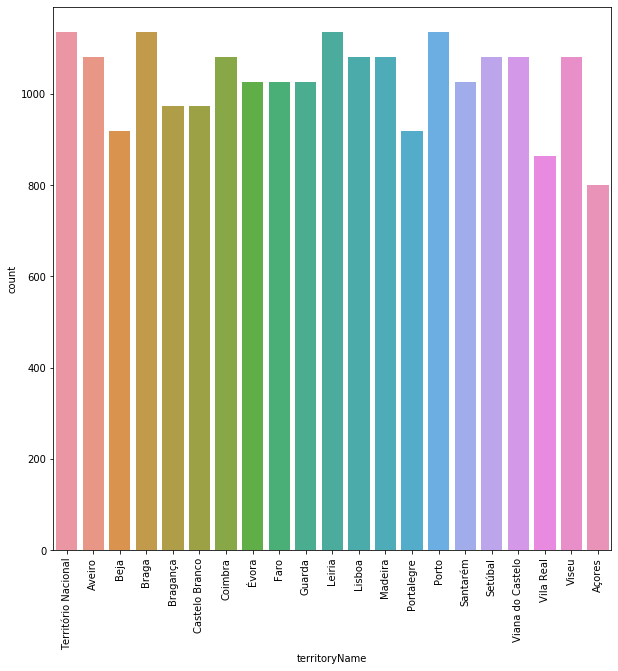

In [9]:
df['territoryName'].unique()
print("TerritoryName Unique Values:\n",df['territoryName'].unique())

plt.figure(figsize=(10,10))
plt.xticks(rotation=90)
sns.countplot(x='territoryName', data=df)

Party Unique Values:
 ['PS' 'PPD/PSD' 'B.E.' 'CDS-PP' 'PCP-PEV' 'PAN' 'CH' 'R.I.R.' 'PCTP/MRPP'
 'A' 'L' 'IL' 'JPP' 'NC' 'PDR' 'PNR' 'PURP' 'PPM' 'MPT' 'PTP' 'MAS']


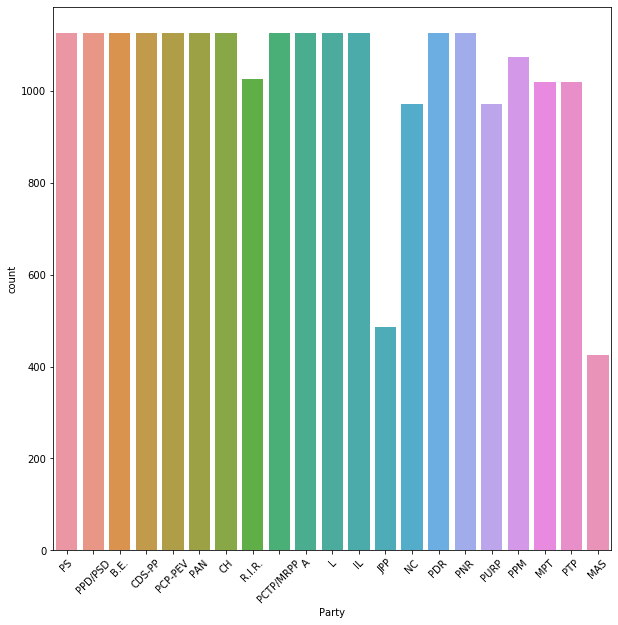

In [10]:
print("Party Unique Values:\n",df['Party'].unique())

plt.figure(figsize=(10,10))
plt.xticks(rotation=45)
sns.countplot(x='Party', data=df)

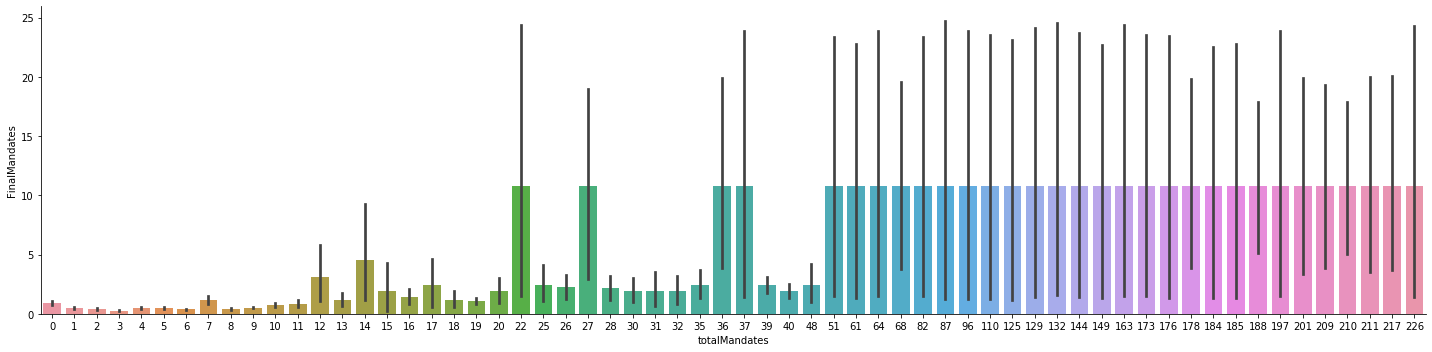

In [11]:
sns.factorplot(x ='totalMandates' , y='FinalMandates', kind = 'bar', data=df,aspect = 4)

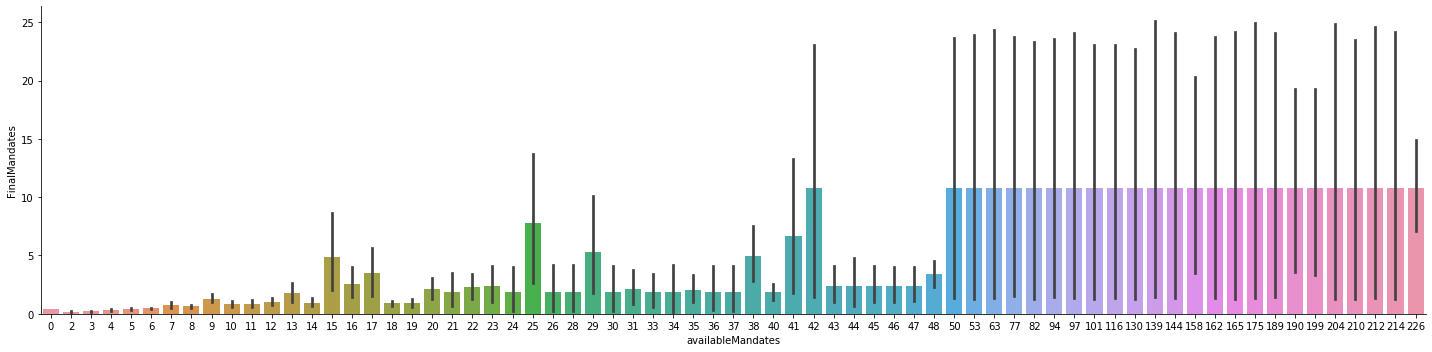

In [12]:
sns.factorplot(x ='availableMandates' , y='FinalMandates', kind = 'bar', data=df,aspect = 4)

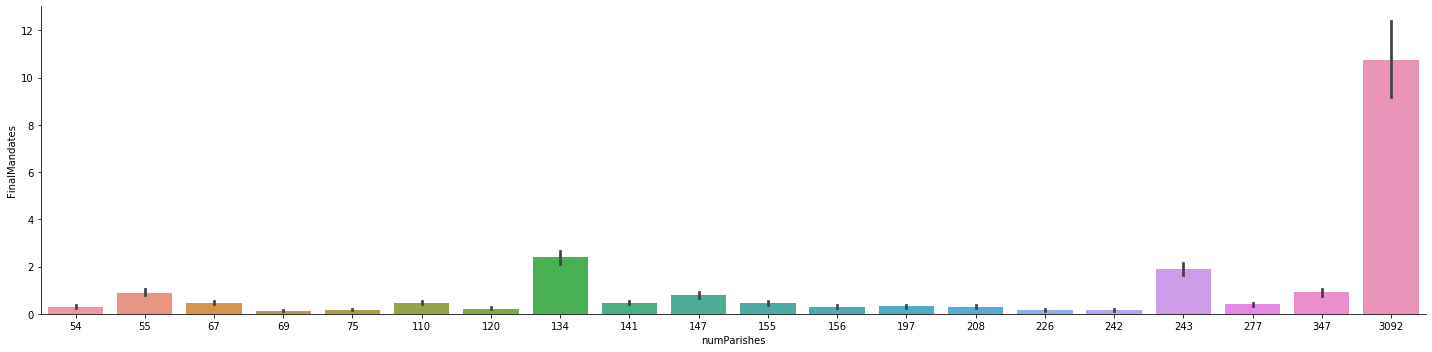

In [13]:
sns.factorplot(x ='numParishes' , y='FinalMandates', kind = 'bar', data=df,aspect = 4)

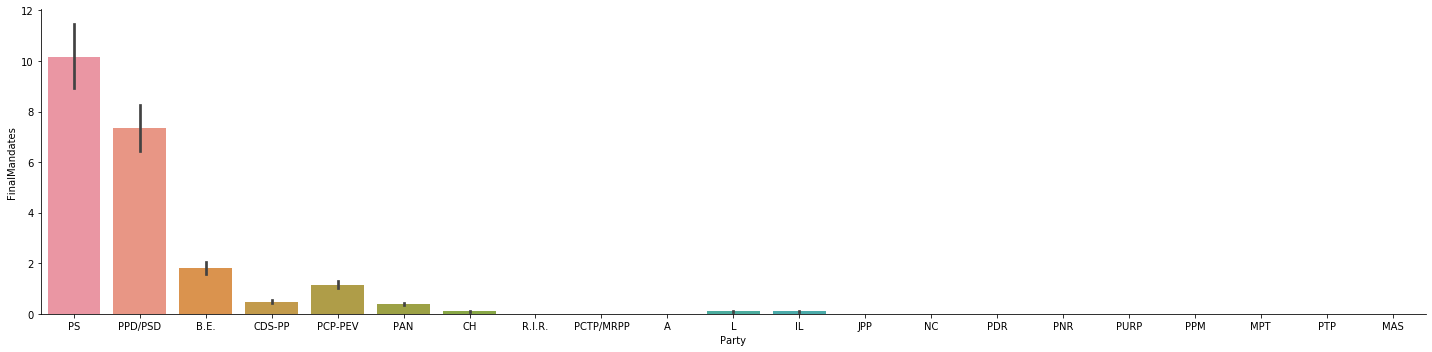

In [14]:
sns.factorplot(x ='Party' , y='FinalMandates', kind = 'bar', data=df,aspect = 4)

<function matplotlib.pyplot.show(*args, **kw)>

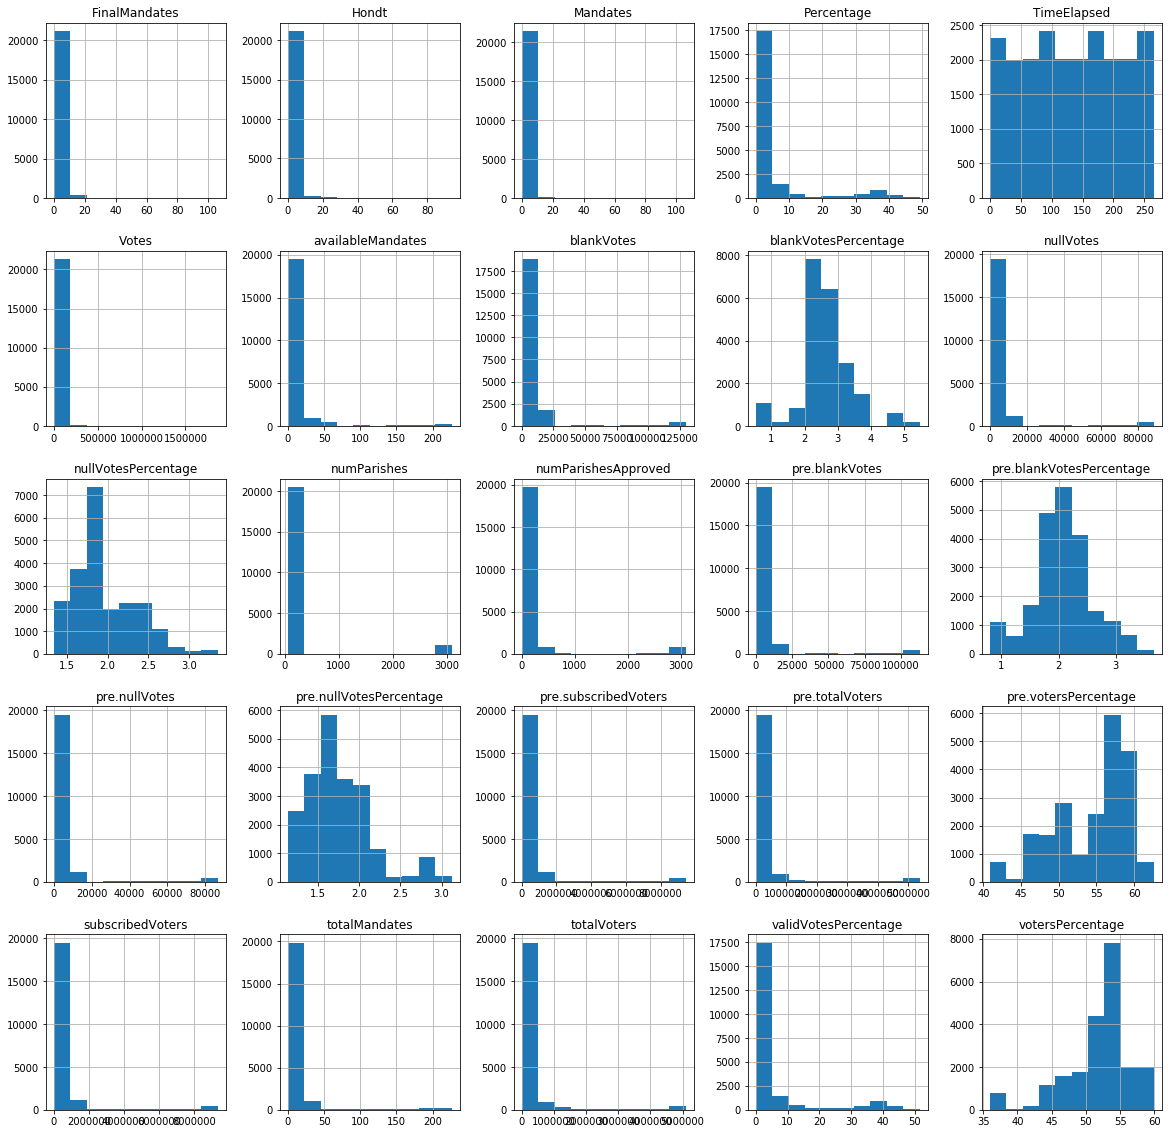

In [15]:
df.hist(figsize=(20,20))
plt.show

In [16]:
df.drop('time',axis=1,inplace=True)

In [17]:
# label encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['territoryName']=le.fit_transform(df['territoryName'])
df['Party']=le.fit_transform(df['Party'])

In [18]:
y = df['FinalMandates']
df_x = df.drop('FinalMandates', axis = 1)
print(df_x.shape)
print(y.shape)

(21643, 26)
(21643,)


In [19]:
# scaling down using standard scaler
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(df_x)

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
def maxr2_score(regr,x,y):
    max_r_score=0
    for r_state in range(42,101):
        x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=0.30)
        regr.fit(x_train,y_train)
        y_pred=regr.predict(x_test)
        r2_scr=r2_score(y_test,y_pred)
        #print('r2_score corresponding to random state: ',r_state,"is:",r2_scr)
        if r2_scr>max_r_score:
            max_r_score=r2_scr
            final_r_state=r_state
    print('\n\nmax r2 score corresponding to random state:',final_r_state,"is",max_r_score)
    return final_r_state

In [21]:
#lets use linear regression and check max  r2 score corresponding to different random states
from sklearn.linear_model import LinearRegression
lreg=LinearRegression()
r_state=maxr2_score(lreg,x,y)



max r2 score corresponding to random state: 73 is 0.9947641024193491


In [22]:
#lets use grid_search to find optimal value of n_neigbors for KNN model
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
neighbors={'n_neighbors':range(1,30)}
knr=KNeighborsRegressor()
gknr=GridSearchCV(knr,neighbors,cv=10)
gknr.fit(x,y)
gknr.best_params_

{'n_neighbors': 1}

In [23]:
#lets use KNN Regression and check max r2 score corresponding to different random states
knr=KNeighborsRegressor(n_neighbors=1)
r_state=maxr2_score(knr,x,y)



max r2 score corresponding to random state: 94 is 0.999971416475256


In [24]:
#lets check the mean r2 score of both linear regression model and knn regression
from sklearn.model_selection import cross_val_score
print('Mean r2 score for linear regression : ',cross_val_score(lreg,x,y,cv=5,scoring='r2').mean())
print('Standard deviation in r2 score for Linear Regression : ',cross_val_score(lreg,x,y,cv=5,scoring='r2').std())
print('\n\n Mean r2 score for KNN Regression : ',cross_val_score(knr,x,y,cv=5,scoring='r2').mean())
print('Standard deviation in r2 score for KNN Regression : ',cross_val_score(knr,x,y,cv=5,scoring='r2').std())

Mean r2 score for linear regression :  0.9891226689493848
Standard deviation in r2 score for Linear Regression :  0.009936980809767813


 Mean r2 score for KNN Regression :  0.985655315467876
Standard deviation in r2 score for KNN Regression :  0.017022850168381246


In [25]:
#lets check Lasso regression and find best value of alpha
from sklearn.linear_model import Lasso
lsreg=Lasso()
parameters={'alpha':[0.001,0.01,0.1,1]}
clf=GridSearchCV(lsreg,parameters,cv=10)
clf.fit(x,y)
clf.best_params_

{'alpha': 0.001}

In [26]:
#lets check max r2 score when we use lasso
lsreg=Lasso(alpha=0.001)
r_state=maxr2_score(lsreg,x,y)



max r2 score corresponding to random state: 73 is 0.9947455484042408


In [27]:
# we tried all the model and till now KNN Regression is the best
#random state corresponding to highest r2_score is 94
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=94,test_size=0.30)
knr=KNeighborsRegressor(n_neighbors=1)
knr.fit(x_train,y_train)
y_pred=knr.predict(x_test)

In [28]:
#lets find the rmse and r2_score using sklearn.metrics
import numpy as np
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("RMSE is : ",np.sqrt(mean_squared_error(y_test,y_pred)))
print('r2_score is : ',r2_score(y_test,y_pred))

RMSE is :  0.03723047295473268
r2_score is :  0.999971416475256


In [30]:
from sklearn.externals import joblib
joblib.dump(knr,'FinalMandates_model.pkl')

['FinalMandates_model.pkl']

In [31]:
model=joblib.load('FinalMandates_model.pkl')

In [32]:
result=pd.DataFrame(model.predict(x_test))

In [33]:
result.to_csv('FinalMandates_prdictresults.csv')